# Airplane Delay Machine Learning Project

![](https://i.imgur.com/3xMAbgy.png)

## Introduction

This project is attempting to use supervised machine learning to predict the delay of an airplane given various data points gathered from previous flight data to help predict future delays. That is essentially the core of machine learning as a concept; we take a set of data, sanitize it to be readable for a computer, and give it to a machine learning algorithm to produce a result to predict the future.

There are two forms of supervised machine learning problems: Regression and Classification.

Regression is producing an output number or numbers given a variable number of inputs such as date, weather, price, depending on the dataset 

Classification on the other hand is more often a yes or no question such as does this person have X medical condition, given a variable number of inputs such as age, weight, height, once again depending on the dataset.

This project is a classification problem as it requires the machine learning model to predict airplane delay based on certain classes of delay.


## Project Outline

1. Install and Import Required Libraries
2. Download the Dataset
3. Column Description
4. Cleaning Data
5. Exploratory Data Analysis
6. Feature Engineering
7. Training/Test/Validation
8. Imputation, Scaling and Encoding
9. Machine Learning Models
10. Comparing Results
11. Conclusion and Further Improvements


## Libraries Used

 - [os](https://docs.python.org/3/library/os.html)
 - [opendatasets](https://github.com/JovianML/opendatasets)
 - [numpy](https://numpy.org/)
 - [pandas](https://pandas.pydata.org/)
 - [matplotlib](https://matplotlib.org/)
 - [seaborn](https://seaborn.pydata.org/)
 - [selenium](https://www.selenium.dev/)
 - [time](https://docs.python.org/3/library/time.html)
 - [psutil](https://pypi.org/project/psutil/)
 - [scikit-learn](https://scikit-learn.org/)
 - [xgboost](https://xgboost.readthedocs.io/)
 - [regex](https://docs.python.org/3/library/re.html)

# 1. Install and Import Required Libraries

## Section Outline

- Install required libraries
- Import libraries
- set options for matplotlib, pandas and chromedriver

In [2]:
# Install all of the libraries 
!pip install numpy pandas-profiling matplotlib seaborn opendatasets selenium bayesian-optimization --quiet

In [3]:
# Install chromedriver for selenium web scraping
!apt-get update --quiet
!apt install chromium-chromedriver --quiet

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [4]:
# Import all of the libraries to be used in the project
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import psutil
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import re
%matplotlib inline

# Set options for matplotlib, pandas and chromedriver
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [5]:
# Save the project
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nsrinath97/airplane-delay-prediction-machine-learning-project


'https://jovian.ai/nsrinath97/airplane-delay-prediction-machine-learning-project'

# 2. Download the Dataset

## Section Outline

- Download the dataset from kaggle using opendatasets
- Create the dataframe using pandas to read the downloaded csv file
- Show information about the raw data 

In [6]:
# Download the required dataset with opendatasets
od.download('https://www.kaggle.com/datasets/giovamata/airlinedelaycauses')

Skipping, found downloaded files in "./airlinedelaycauses" (use force=True to force download)


In [7]:
# Supplementary dataset to be used later in the project
od.download('https://www.kaggle.com/datasets/srinathnanduri97/weather-data-for-265-airports-in-the-united-states')

Skipping, found downloaded files in "./weather-data-for-265-airports-in-the-united-states" (use force=True to force download)


In [8]:
# Create DataFrame
airline_df = pd.read_csv('./airlinedelaycauses/DelayedFlights.csv')
airline_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [9]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [10]:
round(airline_df.describe(), 2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,1936560.00,1928371.00,1928371.00,1936758.00,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,3341651.15,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,133.31,134.30,108.28,42.20,43.19,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,72.06,71.34,68.64,56.78,53.40,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


# 3. Column Description

## Description of each column as taken from the data source



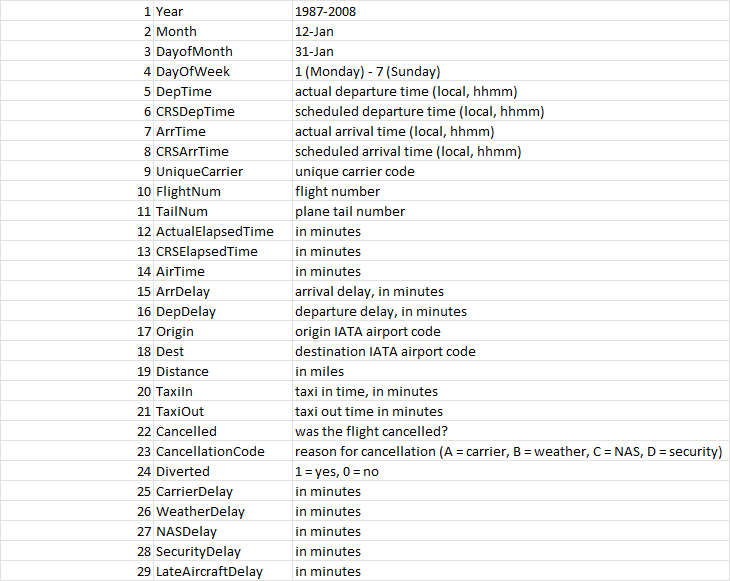

# 4. Cleaning Data

## Section Outline

- Remove unnecessary columns and unusable data
- Drop all null values*
- Convert the datatypes of each numeric column to reduce memory consumption

*All null values were dropped specifically for this dataset to reduce memory consumption and increase processing speed. In many cases, imputation is a viable strategy of dealing with null values rather than discarding all of the data.



In [11]:
# Filter out unneccessary columns

# 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'
# were all filtered out as they represent future data, something that a person
# wouldn't have when trying to predict the delay of a plane
data_df = airline_df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 
      'CRSElapsedTime', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'UniqueCarrier', 'AirTime', 
      'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','FlightNum', 'TailNum']]


# Check the datatypes of each column
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   CRSDepTime         int64  
 4   CRSArrTime         int64  
 5   CRSElapsedTime     float64
 6   DepTime            float64
 7   ArrTime            float64
 8   ActualElapsedTime  float64
 9   UniqueCarrier      object 
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             float64
 17  TaxiOut            float64
 18  FlightNum          int64  
 19  TailNum            object 
dtypes: float64(9), int64(7), object(4)
memory usage: 295.5+ MB


In [12]:
# Drop all null values
data_df = data_df.dropna()

# Convert the datatypes for each column to allocate less maxiumum space per data entry
conversion = {"Month": np.uint8,
              "DayofMonth": np.uint8,
              "DayOfWeek": np.uint8,
              "CRSDepTime": np.uint16,
              "CRSArrTime": np.uint16,
              "CRSElapsedTime": np.int16,
              "DepTime":np.uint16,
              "ArrTime":np.uint16,
              "ActualElapsedTime": np.uint16,
              "AirTime": np.uint16,
              "ArrDelay": np.uint16,
              "DepDelay": np.uint16,
              "Distance": np.uint16,
              "TaxiIn": np.uint16,
              "TaxiOut": np.uint16,
              "FlightNum": np.uint16
              }
data_df = data_df.astype(conversion)

DelayCategories = []

for row in data_df['ArrDelay']:
  if row <= 15:
    DelayCategories.append(0) # little to no delay

  elif 15 < row <= 45:
    DelayCategories.append(1) # small delay

  elif 45 < row <= 120:
    DelayCategories.append(2) # medium delay
  
  elif row > 120:
    DelayCategories.append(3) # large delay

data_df['DelayCategories'] = DelayCategories  

# 5. Exploratory Data Analysis

## Section Outline

- Plot graphs for various columns vs departure delay to visualize the correlation

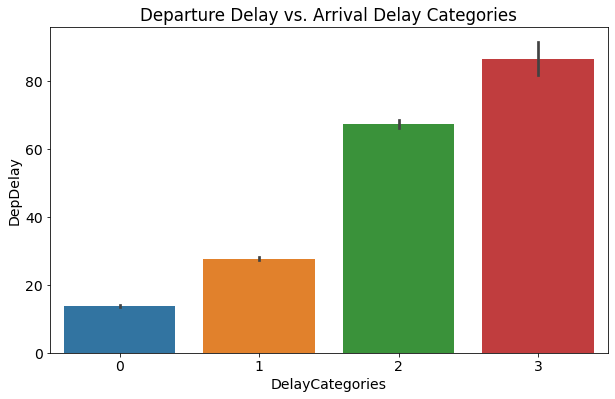

In [13]:
plt.title('Departure Delay vs. Arrival Delay Categories')
sns.barplot(data=data_df.sample(10000), x='DelayCategories', y='DepDelay', order=[0, 1, 2, 3])

Find the correlation between departure delay and the arrival delay.

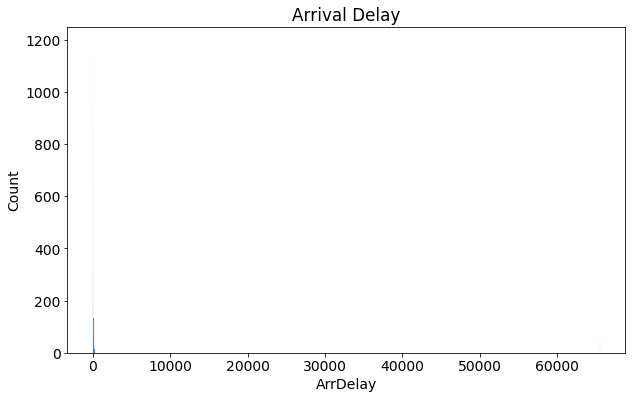

In [14]:
plt.title('Arrival Delay')
sns.histplot(data_df.sample(10000), x='ArrDelay')

Show the distribution of arrival delays

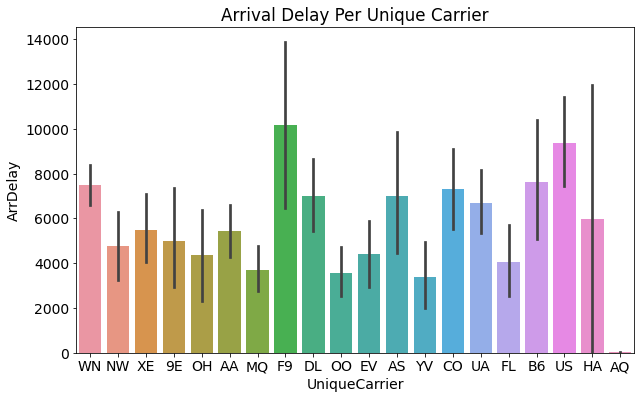

In [15]:
plt.title('Arrival Delay Per Unique Carrier')
sns.barplot(data=data_df.sample(10000), x='UniqueCarrier', y='ArrDelay')

Find the delay for each unique type of carrier.

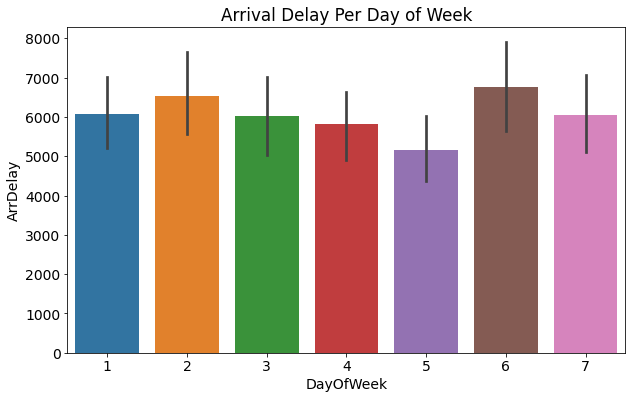

In [16]:
plt.title('Arrival Delay Per Day of Week')
sns.barplot(data=data_df.sample(10000), x='DayOfWeek', y='ArrDelay')

Find the arrival delay per day of the week (1 is Monday, 7 is Sunday). The graph shows Saturday to have the highest delay.

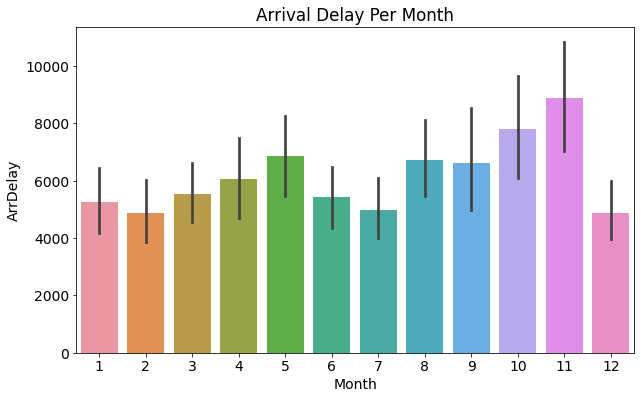

In [17]:
plt.title('Arrival Delay Per Month')
sns.barplot(data=data_df.sample(10000), x='Month', y='ArrDelay')

The graph shows that the months leading up to the holidays seem to have the highest delay. May is right before summer vacation for schoolchildren and has the highest delay for the drier months. November is the highest for the winter months and is also far more likely to have extreme weather conditions, which could account for the large amount of delay in the two previous months as well compared to the rest.

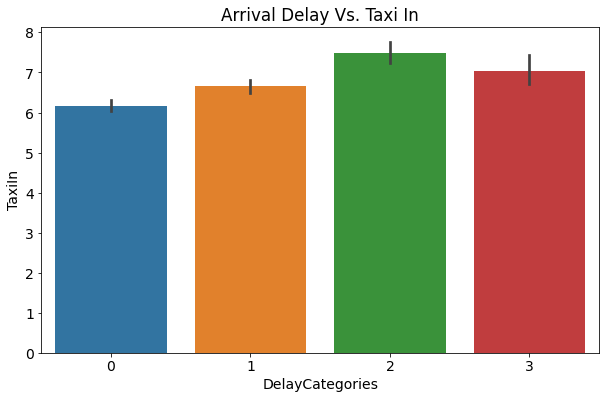

In [18]:
plt.title('Arrival Delay Vs. Taxi In')
sns.barplot(data=data_df.sample(10000), y='TaxiIn', x='DelayCategories', order=[0, 1, 2, 3])

There seems to be a correlation between delay and taxi in up to the very last category of the large delay. This could be due to that a large delay would have many other extenuating factors that the slight delay caused by a long taxi time would not affect the delay amount by a lot.

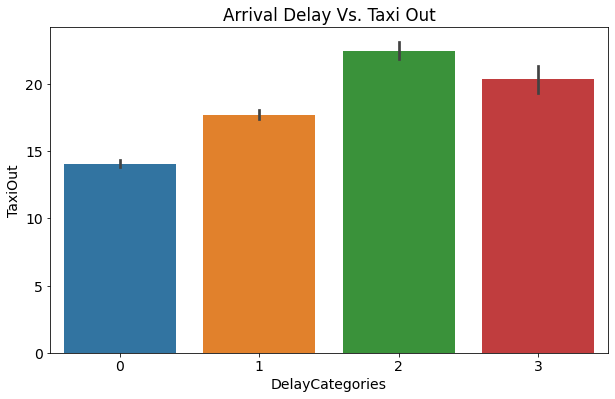

In [19]:
plt.title('Arrival Delay Vs. Taxi Out')
sns.barplot(data=data_df.sample(10000), y='TaxiOut', x='DelayCategories', order=[0, 1, 2, 3])

The same observation can be found on this graph as well as the previous one. There is correlation between delay and taxi time until the delay gets too large for the taxi time to matter much.

# 6. Feature Engineering

## Section Outline

- Obtain supplementary weather dataset to help increase the number of features and columns the machine learning models have to make an accurate prediction
  - Read new dataset to pandas dataframe and clean it
  - Convert datatypes of columns to reduce memory consumption
  - Merge the airline delay dataframe and the weather dataframe into one

- Extract what features can be gotten from the existing data


## Obtaining New Dataset

![](https://imgs.search.brave.com/QflXKGV6wDxap38CcLi-q5L3l0d72NxeMhnVLSlnR_E/rs:fit:1104:658:1/g:ce/aHR0cHM6Ly9jZG4u/d2FsbHBhcGVyc2Fm/YXJpLmNvbS80MC8y/My9yRnZBaE0ucG5n)

The new dataset contains the weather data for the airports in the airline dataframe for every day of 2008. Using Selenium, the  [Weather Underground](https://www.wunderground.com/) website was scraped for historical data. For the purposes of this project, the code executing the below functions has been commented out to save time. It was originally ran locally and the output was compiled into a single csv file containing all of the weather data. The runtime of this scraper is approximately 10hrs long.

In [20]:
# Headers for the CSV files
headers = ["Month", "Day", "Temperature (°F)", "Dew Point (°F)", "Humidity (%)", "Wind Speed (mph)", "Pressure (in)",
           "Precipitation (in)", "Location"]

In [21]:
# Get the table from the website using selenium webdriver to locate the class name for the table
def get_table(page_url):
    # Fetching page
    driver.get(page_url)
    time.sleep(10)

    # Get table
    table_class = "observation-table.ng-star-inserted"
    table = driver.find_elements(By.CLASS_NAME, table_class)
    return table

In [22]:
# Parse each column of the table into a dictionary which can be converted to a Pandas dataframe
def parse_table(observation_table, location_code):

    # Write the data into a text file
    with open('table.txt', 'w') as f:
        for row in observation_table:
            f.write(row.text)

    # Read the data from the text file
    with open('table.txt', 'r') as f:

        # If the text file has a size of 0, then there is no data to read
        if os.stat('table.txt').st_size == 0:
            return

        # Find how many rows the table has
        rows = driver.find_elements(By.XPATH,
                                    """//*[@id="inner-content"]/div[2]/div[1]/div[5]/div[1]/div/lib-city-history-observation/div/div[2]/table/tbody/tr/td[1]/table/tr""")
        num_rows = len(rows) - 1

        # Create a list for each of the columns
        month, day, temperature, dew_point, humidity, wind_spd, pressure, precip, location = [], [], [], [], [], [], [], [], []
        header_list = [month, day, temperature, dew_point, humidity, wind_spd, pressure, precip, location]

        # Month column
        f.readline()
        month.append(f.readline().strip('\n'))
        month *= num_rows

        # Location column
        location.append(location_code)
        location *= num_rows

        # Days column
        for i in range(num_rows):
            day.append(f.readline().strip('\n'))
        f.readline()

        # Temperature, Dew Point, Humidity, Wind Speed, Pressure columns
        for header in header_list[2:-2]:
            for i in range(num_rows):
                templine = f.readline().split(' ')[1]
                header.append(templine)
            f.readline()

        # Precipitation column
        for i in range(num_rows):
            precip.append(f.readline().strip('\n'))

    # Create a dictionary and format it in the shape of a dataframe
    data_dict = dict()
    for i, j in zip(headers, header_list):
        data_dict[i] = j

    # Return the dictionary as the output of the function
    return data_dict

In [23]:
# origin = data_df.Origin.unique().tolist()
# dest = data_df.Dest.unique().tolist()
# locations = list(set(origin + dest))
# len(locations)

# # Create the directory to store the csv files for each airport
# if not os.path.exists('weather-csv-files'):
#     os.makedirs('weather-csv-files')

# # For each location
# for code in locations:

#     # Empty dataframe with the columns to add to
#     weather_df = pd.DataFrame(columns=["Month", "Day", "Temperature (°F)", "Dew Point (°F)", "Humidity (%)",
#                                        "Wind Speed (mph)", "Pressure (in)", "Precipitation (in)", "Location"])
    
#     # The base url to modify for each page
#     base_url = 'https://www.wunderground.com/history/monthly/K' + code + '/date/2008-'
#     print(code)

#     # For the whole year
#     for months in range(1, 13):
#         print(months)
#         url = base_url + str(months)

#         # Get the data dictionary with weather data
#         obs_table = get_table(url)
#         month_dict = parse_table(obs_table, code)

#         # If the dictionary doesn't exist (i.e. there is no data) go to the next location
#         if not month_dict:
#             break

#         # add the dictionary as a dataframe to the weather dataframe
#         weather_df = pd.concat([weather_df, pd.DataFrame(month_dict)])

#     # send the dataframe to a csv file
#     weather_df.to_csv("weather-csv-files\\" + code + ".csv", index=False)

![](https://i.imgur.com/4ZSy4uZ.png)

The dataset was uploaded to [Kaggle](https://www.kaggle.com/datasets/srinathnanduri97/weather-data-for-265-airports-in-the-united-states) and is the supplementary dataset downloaded at the beginning.

In [24]:
weather_df = pd.read_csv('./weather-data-for-265-airports-in-the-united-states/weather.csv')
weather_df

,Month,Day,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),Precipitation (in),Location
0,Jan,1,38.1,28.2,72.3,11.5,29.4,0.0,ABE
1,Jan,2,26.0,11.0,53.5,16.4,29.6,0.0,ABE
2,Jan,3,17.2,1.6,51.4,8.5,30.2,0.0,ABE
3,Jan,4,24.8,10.3,56.4,6.1,30.1,0.0,ABE
4,Jan,5,30.9,20.1,66.6,1.8,29.9,0.0,ABE
...,...,...,...,...,...,...,...,...,...
96545,Dec,27,20.0,16.7,87.8,1.4,28.7,0.0,YKM
96546,Dec,28,32.0,25.7,83.2,4.0,28.8,0.0,YKM
96547,Dec,29,30.1,23.3,88.9,4.1,28.7,0.0,YKM
96548,Dec,30,27.2,23.6,86.8,3.4,29.1,0.0,YKM


In [25]:
# Drop the precipitation column as they are all 0s and therefore useless data
weather_df = weather_df.drop('Precipitation (in)', axis=1)

# Rename shared columns for merging dataframes
weather_df = weather_df.rename(columns={'Location': "Dest", "Day": "DayofMonth"})

# Convert the month abbreviations into numbers representing each month
month_conversion = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, 
                    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
weather_df['Month'] = weather_df['Month'].apply(lambda x: month_conversion[x])

# Conver the dtypes of each column to reduce memory consumption
conversion_weather = {"DayofMonth": np.uint8,
                      "Month": np.uint8,
                      "Temperature (°F)" :np.float16,
                      "Dew Point (°F)": np.float16,
                      "Humidity (%)": np.float16,
                      "Wind Speed (mph)": np.float16,
                      "Pressure (in)": np.float16}
weather_df = weather_df.astype(conversion_weather)

In [26]:
# Merge the two dataframes on the three common columns using left join
merged_df = pd.merge(data_df, weather_df, on=["Month", "DayofMonth", "Dest"], how="left")
merged_df

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,DepTime,ArrTime,ActualElapsedTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,FlightNum,TailNum,DelayCategories,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in)
0,1,3,4,1955,2225,150,2003,2211,128,WN,116,65522,8,IAD,TPA,810,4,8,335,N712SW,3,41.093750,19.406250,42.50000,13.203125,30.593750
1,1,3,4,735,1000,145,754,1002,128,WN,113,2,19,IAD,TPA,810,5,10,3231,N772SW,0,41.093750,19.406250,42.50000,13.203125,30.593750
2,1,3,4,620,750,90,628,804,96,WN,76,14,8,IND,BWI,515,3,17,448,N428WN,0,23.296875,6.898438,50.59375,7.898438,30.500000
3,1,3,4,1755,1925,90,1829,1959,90,WN,77,34,34,IND,BWI,515,3,10,3920,N464WN,1,23.296875,6.898438,50.59375,7.898438,30.500000
4,1,3,4,1915,2110,115,1940,2121,101,WN,87,11,25,IND,JAX,688,4,10,378,N726SW,0,32.687500,17.296875,53.59375,9.101562,30.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928368,12,13,6,1220,1552,152,1250,1617,147,DL,120,25,30,MSP,ATL,906,9,18,1621,N938DL,1,37.593750,23.906250,60.09375,6.699219,29.203125
1928369,12,13,6,600,749,109,657,904,127,DL,78,75,57,RIC,ATL,481,15,34,1631,N3743H,2,37.593750,23.906250,60.09375,6.699219,29.203125
1928370,12,13,6,847,1010,143,1007,1149,162,DL,122,99,80,ATL,IAH,689,8,32,1631,N909DA,2,58.406250,50.812500,73.68750,11.898438,29.906250
1928371,12,13,6,1240,1437,117,1251,1446,115,DL,89,9,11,IAD,ATL,533,13,13,1639,N646DL,0,37.593750,23.906250,60.09375,6.699219,29.203125


In [27]:
# Drop all null values
merged_df = merged_df.dropna()

## Extract Features From Data

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.

From the "Month" column, we can create the "Season" feature, which can help decipher if people fly more during summer vacation or winter holidays for example.

In [28]:
# Grab the season from the months
merged_df['Season'] = merged_df.Month % 12 // 3 + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
merged_df.Season.unique()

array([1, 2, 3, 4], dtype=uint8)

Season Legend:

1. Winter
2. Spring
3. Summer
4. Fall

In [30]:
merged_df = merged_df.reset_index(drop=True)
merged_df

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,DepTime,ArrTime,ActualElapsedTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,FlightNum,TailNum,DelayCategories,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),Season
0,1,3,4,1955,2225,150,2003,2211,128,WN,116,65522,8,IAD,TPA,810,4,8,335,N712SW,3,41.093750,19.406250,42.50000,13.203125,30.593750,1
1,1,3,4,735,1000,145,754,1002,128,WN,113,2,19,IAD,TPA,810,5,10,3231,N772SW,0,41.093750,19.406250,42.50000,13.203125,30.593750,1
2,1,3,4,620,750,90,628,804,96,WN,76,14,8,IND,BWI,515,3,17,448,N428WN,0,23.296875,6.898438,50.59375,7.898438,30.500000,1
3,1,3,4,1755,1925,90,1829,1959,90,WN,77,34,34,IND,BWI,515,3,10,3920,N464WN,1,23.296875,6.898438,50.59375,7.898438,30.500000,1
4,1,3,4,1915,2110,115,1940,2121,101,WN,87,11,25,IND,JAX,688,4,10,378,N726SW,0,32.687500,17.296875,53.59375,9.101562,30.593750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750741,12,13,6,1220,1552,152,1250,1617,147,DL,120,25,30,MSP,ATL,906,9,18,1621,N938DL,1,37.593750,23.906250,60.09375,6.699219,29.203125,1
1750742,12,13,6,600,749,109,657,904,127,DL,78,75,57,RIC,ATL,481,15,34,1631,N3743H,2,37.593750,23.906250,60.09375,6.699219,29.203125,1
1750743,12,13,6,847,1010,143,1007,1149,162,DL,122,99,80,ATL,IAH,689,8,32,1631,N909DA,2,58.406250,50.812500,73.68750,11.898438,29.906250,1
1750744,12,13,6,1240,1437,117,1251,1446,115,DL,89,9,11,IAD,ATL,533,13,13,1639,N646DL,0,37.593750,23.906250,60.09375,6.699219,29.203125,1


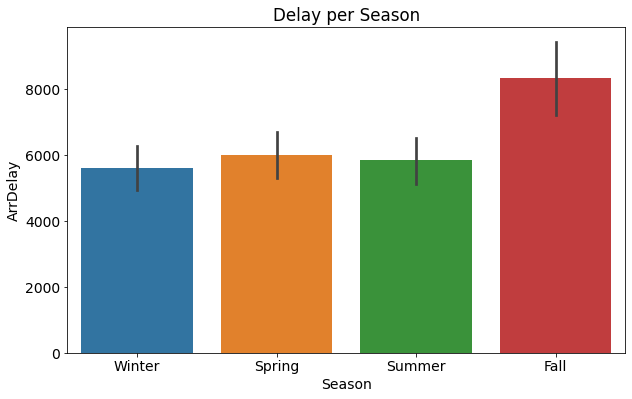

In [31]:
plt.title("Delay per Season")
season = sns.barplot(data=merged_df.sample(10000), x='Season', y='ArrDelay')
season.set_xticklabels(['Winter', 'Spring', 'Summer', 'Fall'], fontdict=None, minor=False)
plt.show()

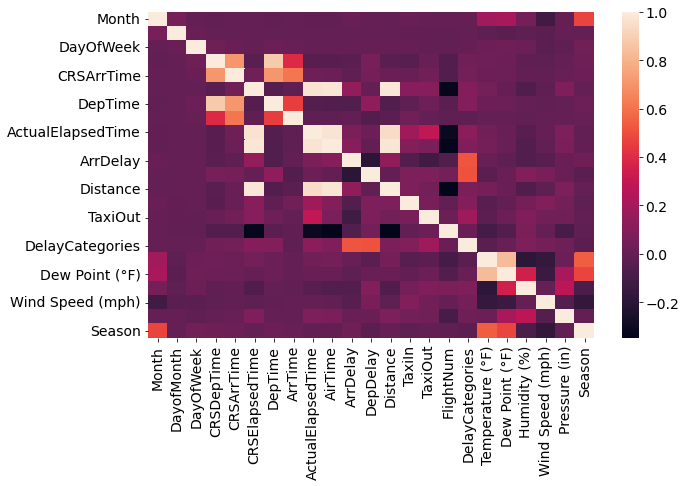

In [32]:
sns.heatmap(merged_df.corr())

# 7. Training/Validation/Test

## Section Outline

- Take a 10% sample of the dataset to reduce the size
- Create a split of 60/20/20 for Train/Val/Test datasets
- Separate input columns from output
- Separate numerical columns from categorical
- Create a dataframe for each of the splits for inputs and a series for the output


In [33]:
# Create a sample of the database to use for machine learning to reduce processing time
use_sample = True
sample_fraction = 0.1
if use_sample:
  merged_df = merged_df.sample(frac=sample_fraction).copy()

In [34]:
# Assign the training dataset size and the split size
train_size = int(.6 * len(merged_df))
split_size = int(.8 * len(merged_df))

In [35]:
# Create 3 new dataframes, one for each of the splits
train_df, val_df, test_df  = merged_df[:train_size], merged_df[train_size:split_size], merged_df[split_size:]
len(train_df), len(val_df), len(test_df)

(105045, 35015, 35015)

In [36]:
# Separate input and target columns
input_cols = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum',
              'Origin', 'Dest', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 
              'Season', 'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 
              'Wind Speed (mph)', 'Pressure (in)', 'FlightNum']

target_cols = 'DelayCategories'


# Separate numeric and categorical columns
numeric_cols = ['DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 
              'Season', 'Temperature (°F)', 'Dew Point (°F)', 'Humidity (%)', 
              'Wind Speed (mph)', 'Pressure (in)', 'FlightNum']

categorical_cols = ['DayofMonth', 'DayOfWeek', 'Month', 'UniqueCarrier', 'Origin', 'Dest', 'Season', 'FlightNum', 'TailNum']


# Separate the input and the target values
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

# 8. Imputation, Scaling and Encoding

## Section Outline

- Imputing (filling) missing values into the dataset which can use various techniques such as filling missing values using the mean of the column*
- Scaling numerical values from 0 to 1 for every numerical column to prevent columns with larger values from eclipsing other columns
- Encoding categorical columns using [mean-target encoding](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0)
- Create the final three datasets for training, validation and test using the scaled numerical columns and the encoded columns


*For this project, imputing is unnecessary as the null values have been dropped from the DataFrame. This is due to the large size of the dataset to reduce processing time, else the imputer would fill in the null values with the mean of the column.

## Imputation

In [37]:
# imputer = SimpleImputer(strategy='mean').fit(merged_df[numeric_cols])

In [38]:
# train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
# val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
# test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [39]:
# test_inputs[numeric_cols].isna().sum()

## Scaling

In [40]:
scaler = MinMaxScaler().fit(merged_df[numeric_cols])

In [41]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [42]:
test_inputs[numeric_cols].describe().loc[['min', 'max']]

,DepDelay,Distance,TaxiIn,TaxiOut,Season,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),FlightNum
min,0.0,0.0,0.000000,0.003021,0.0,0.051039,0.047661,0.0,0.004512,0.0,0.000000
max,1.0,1.0,0.874286,0.861027,1.0,1.000000,0.974931,1.0,0.895628,1.0,0.803779


## Encoding

In [43]:
categorical_cols, target_cols

(['DayofMonth',
  'DayOfWeek',
  'Month',
  'UniqueCarrier',
  'Origin',
  'Dest',
  'Season',
  'FlightNum',
  'TailNum'],
 'DelayCategories')

In [44]:
encoder = LabelEncoder().fit(merged_df['DelayCategories'])

In [45]:
for i in merged_df[categorical_cols]:
  encoder = LabelEncoder()
  train_inputs[i] = encoder.fit_transform(train_inputs[i])
  val_inputs[i] = encoder.fit_transform(val_inputs[i])
  test_inputs[i] = encoder.fit_transform(test_inputs[i])

In [46]:
# encoded_cols = []
# for i in categorical_cols:
#   encoded_df = merged_df.groupby(i)[['ArrDelay']].mean()
#   encoded_df = encoded_df.reset_index()
#   encoded_col = i + '_encoded'
#   encoded_df.columns = [i, encoded_col]
#   encoded_cols.append(encoded_col)
#   train_inputs = train_inputs.merge(encoded_df, on=i)
#   val_inputs = val_inputs.merge(encoded_df, on=i)
#   test_inputs = test_inputs.merge(encoded_df, on=i)

# encoded_cols

In [47]:
train_inputs

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,Origin,Dest,DepDelay,Distance,TaxiIn,TaxiOut,Season,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),FlightNum
1163328,7,12,2,17,2896,164,154,0.000629,0.079580,0.017143,0.039275,2,0.760892,0.835009,0.716250,0.081232,0.935058,53
1302021,8,10,3,17,1926,226,233,0.008799,0.094728,0.022857,0.024169,3,0.741641,0.747267,0.579062,0.137694,0.967529,903
643608,3,13,0,1,2406,71,212,0.013828,0.269441,0.040000,0.036254,1,0.650963,0.432881,0.220937,0.462623,0.821410,1053
1521587,10,13,4,6,5106,15,166,0.115651,0.132902,0.028571,0.030211,3,0.546353,0.598018,0.801875,0.182828,0.938610,1270
254112,1,0,4,17,1393,160,67,0.013199,0.090891,0.022857,0.021148,0,0.523556,0.458971,0.458125,0.232370,0.960934,2781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238897,1,11,1,15,4846,194,183,0.022627,0.081802,0.011429,0.081571,0,0.245567,0.278002,0.730000,0.162465,0.944698,633
921108,5,17,2,11,2257,71,105,0.002514,0.024843,0.017143,0.039275,2,0.856636,0.845212,0.515000,0.117331,0.951294,3392
1567751,10,1,6,6,1095,246,14,0.007542,0.385377,0.068571,0.030211,3,0.637791,0.614633,0.514062,0.088020,0.948250,894
1098812,6,30,3,11,3325,83,185,0.031427,0.052919,0.051429,0.353474,2,0.784701,0.884565,0.755000,0.153473,0.941654,4140


In [48]:
val_inputs

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,Origin,Dest,DepDelay,Distance,TaxiIn,TaxiOut,Season,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),FlightNum
1206058,7,2,6,15,1096,36,179,0.032684,0.093314,0.040000,0.024169,2,0.770010,0.818977,0.640000,0.135402,0.951294,124
87668,0,17,4,6,3051,14,178,0.002514,0.381539,0.017143,0.048338,0,0.606383,0.492494,0.358125,0.148977,0.944698,896
1139379,6,19,6,5,3857,116,184,0.000629,0.366391,0.022857,0.054381,2,0.699595,0.732401,0.630000,0.153473,0.971081,206
1072211,6,28,1,6,2857,132,128,0.000629,0.451828,0.091429,0.054381,2,0.820162,0.818977,0.515938,0.230254,0.971081,125
996481,6,9,3,17,3451,224,132,0.035198,0.065845,0.051429,0.051360,2,0.735056,0.816353,0.711875,0.144394,0.964485,1883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74230,0,2,3,16,1860,162,51,0.002514,0.146637,0.011429,0.042296,0,0.380193,0.332094,0.480000,0.124118,0.971081,1047
1319204,8,11,4,19,4533,251,187,0.025141,0.019996,0.040000,0.042296,3,0.848024,0.754555,0.370937,0.121827,0.928463,2844
302460,1,0,4,0,57,209,73,0.067253,0.089881,0.057143,0.048338,0,0.402862,0.487830,0.850000,0.250529,0.948250,3566
842647,5,29,0,17,3632,110,146,0.019485,0.086851,0.017143,0.030211,2,0.726444,0.847836,0.843750,0.187236,0.879756,3331


In [49]:
test_inputs

,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,Origin,Dest,DepDelay,Distance,TaxiIn,TaxiOut,Season,Temperature (°F),Dew Point (°F),Humidity (%),Wind Speed (mph),Pressure (in),FlightNum
644678,3,9,3,1,2121,174,136,0.105594,0.203797,0.028571,0.078550,1,0.644377,0.656610,0.630000,0.121827,0.977169,1184
650768,3,15,2,1,2707,184,158,0.063482,0.239548,0.028571,0.072508,1,0.702634,0.685760,0.496875,0.230254,0.977169,2044
1645808,11,6,6,15,2576,184,188,0.007542,0.080994,0.022857,0.057402,0,0.337133,0.353593,0.650000,0.347496,0.935058,1196
1415378,9,12,0,14,2570,225,21,0.038341,0.045849,0.022857,0.063444,3,0.644377,0.458096,0.260937,0.146685,0.964485,5079
1195276,7,13,3,13,4788,140,211,0.005657,0.143607,0.022857,0.141994,2,0.774063,0.897391,0.831250,0.083480,0.967529,4767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546587,10,16,0,12,1215,174,129,0.038969,0.260351,0.057143,0.057402,3,0.703647,0.482291,0.214062,0.063205,0.906139,775
532747,3,3,4,17,983,225,131,0.113765,0.065845,0.028571,0.030211,1,0.622594,0.727736,0.823750,0.164757,0.974125,468
246275,1,7,4,16,1213,133,209,0.037084,0.049889,0.045714,0.027190,0,0.627406,0.665063,0.651250,0.060913,0.974125,529
456340,2,19,3,9,4703,14,183,0.001257,0.100384,0.022857,0.036254,1,0.638804,0.575572,0.446875,0.390339,0.964485,900


# 10. Machine Learning Models

The machine learning models being tested in this section are as follows:

- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [XGB Classifier](https://xgboost.readthedocs.io/en/stable/python/index.html)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

The model evaluation tool being used for this section is:

- [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)




In [50]:
def try_model(model):
  # Fit the model
  model.fit(train_inputs, train_targets)
  
  # Generate predictions
  train_preds = model.predict(train_inputs)
  val_preds = model.predict(val_inputs)
  test_preds = model.predict(test_inputs)
  
  # Compute Accuracy
  train_accuracy = accuracy_score(train_targets, train_preds)
  print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

  val_accuracy = accuracy_score(val_targets, val_preds)
  print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

  test_accuracy = accuracy_score(test_targets, test_preds)
  print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

  cf1 = confusion_matrix(train_targets, train_preds, normalize='true')
  cf2 = confusion_matrix(val_targets, val_preds, normalize='true')
  cf3 = confusion_matrix(test_targets, test_preds, normalize='true')

  fig, axes = plt.subplots(1, 3, figsize=(25, 10))
  fig.suptitle('Confusion Matrix')

  sns.heatmap(cf1, ax=axes[0], annot=True)
  axes[0].set_title('Training Accuracy')
  axes[0].set_xlabel("Prediction")
  axes[0].set_ylabel("Target")

  sns.heatmap(cf2, ax=axes[1], annot=True)
  axes[1].set_title('Validation Accuracy')
  axes[1].set_xlabel("Prediction")
  axes[1].set_ylabel("Target")

  sns.heatmap(cf3, ax=axes[2], annot=True)
  axes[2].set_title('Test Accuracy')
  axes[2].set_xlabel("Prediction")
  axes[2].set_ylabel("Target")

  plt.show()

  return (train_accuracy, val_accuracy, test_accuracy)

In [51]:
def hyper_tune(model, params_dict):
  # Initialize grid
  grid = RandomizedSearchCV(estimator=model,
                          param_distributions=params_dict,
                          n_iter=20,
                          cv=5)
  
  grid_results = grid.fit(train_inputs, train_targets)

  best_model = grid_results.best_estimator_
  print(best_model)

  return best_model

## Logistic Regression

Training Accuracy: 63.04%
Validation Accuracy: 62.75%
Test Accuracy: 62.94%


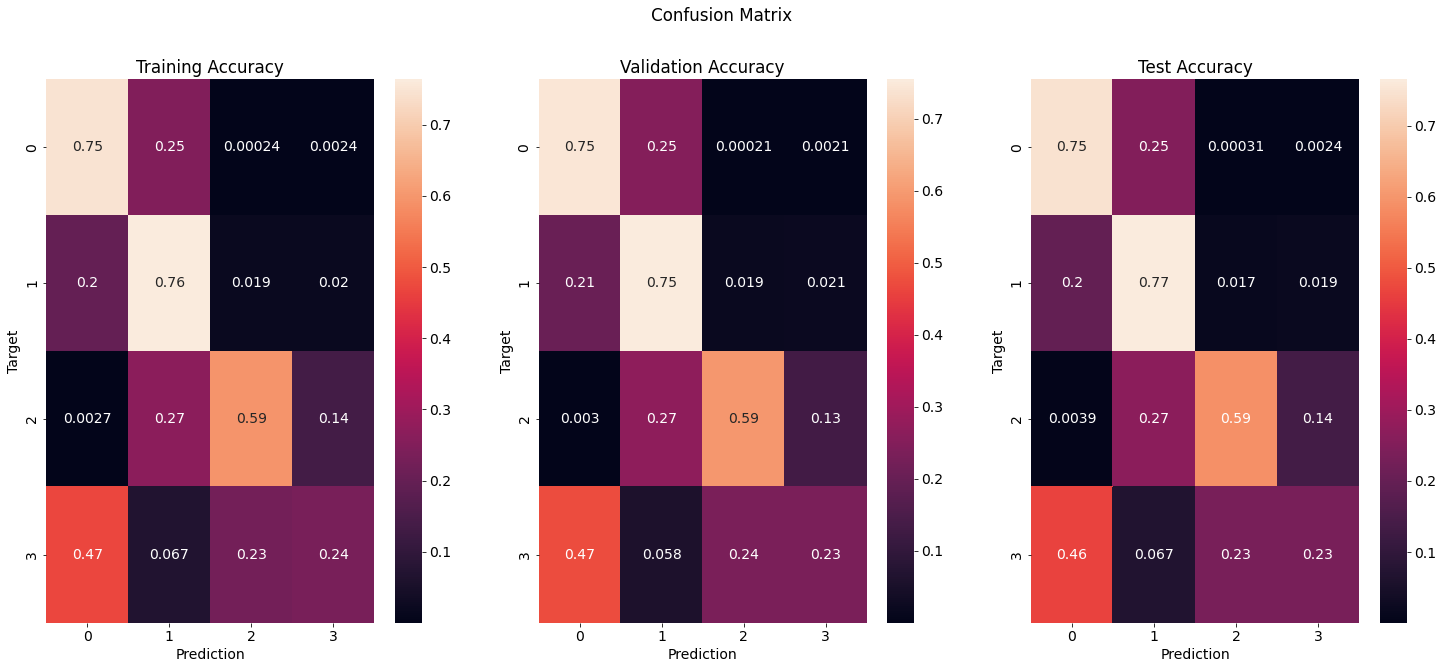

CPU times: user 1.9 s, sys: 910 ms, total: 2.81 s
Wall time: 2min 3s


In [52]:
%%time
log_model = try_model(LogisticRegression(solver='newton-cg', n_jobs=-1))

## XGBoost Classifier

Training Accuracy: 73.06%
Validation Accuracy: 72.87%
Test Accuracy: 72.92%


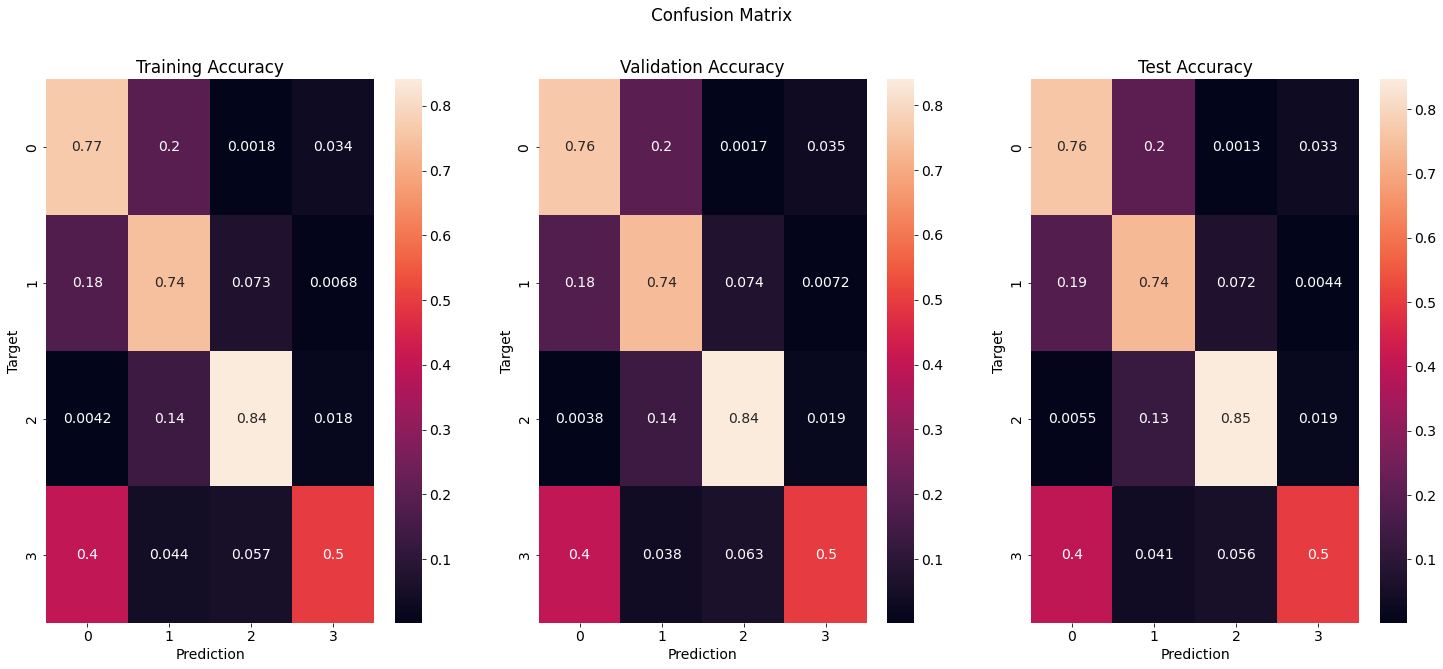

CPU times: user 34 s, sys: 313 ms, total: 34.3 s
Wall time: 34 s


In [53]:
%%time
xgb_model = try_model(xgb.XGBClassifier())

In [54]:
from bayes_opt import BayesianOptimization

In [55]:
dtrain = xgb.DMatrix(train_inputs, train_targets)

In [56]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}

  #Cross validating with the specified parameters in 5 folds and 70 iterations
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)

  #Return the negative RMSE
  return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,300)
                                            })

In [57]:
%%time
xgb_bo.maximize(n_iter=8, init_points=12, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.9175   |  0.7462   |  0.9088   |  7.16     |  166.6    |
|  2        | -0.8809   |  0.29     |  0.7938   |  7.822    |  209.8    |
|  3        | -0.8606   |  0.3932   |  0.7121   |  7.672    |  251.4    |
|  4        | -0.8252   |  0.2308   |  0.8928   |  5.027    |  160.5    |
|  5        | -0.7861   |  0.3771   |  0.4609   |  3.91     |  199.4    |
|  6        | -0.7851   |  0.7628   |  0.4349   |  3.468    |  202.2    |
|  7        | -0.7828   |  0.2307   |  0.2048   |  9.903    |  229.0    |
|  8        | -0.7824   |  0.3908   |  0.4066   |  5.428    |  115.7    |
|  9        | -0.7946   |  0.06353  |  0.7539   |  4.73     |  165.8    |
|  10       | -0.8726   |  0.8998   |  0.5645   |  9.765    |  207.6    |
|  11       | -0.7906   |  0.8975   |  0.7953   |  3.633    |  109.7    |
|  12       | -0.7985   |  0.781    | 

In [58]:
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

In [59]:
params

{'gamma': 0.3908368161002379,
 'learning_rate': 0.40661511515342597,
 'max_depth': 5,
 'n_estimators': 115}

Training Accuracy: 80.51%
Validation Accuracy: 74.47%
Test Accuracy: 74.41%


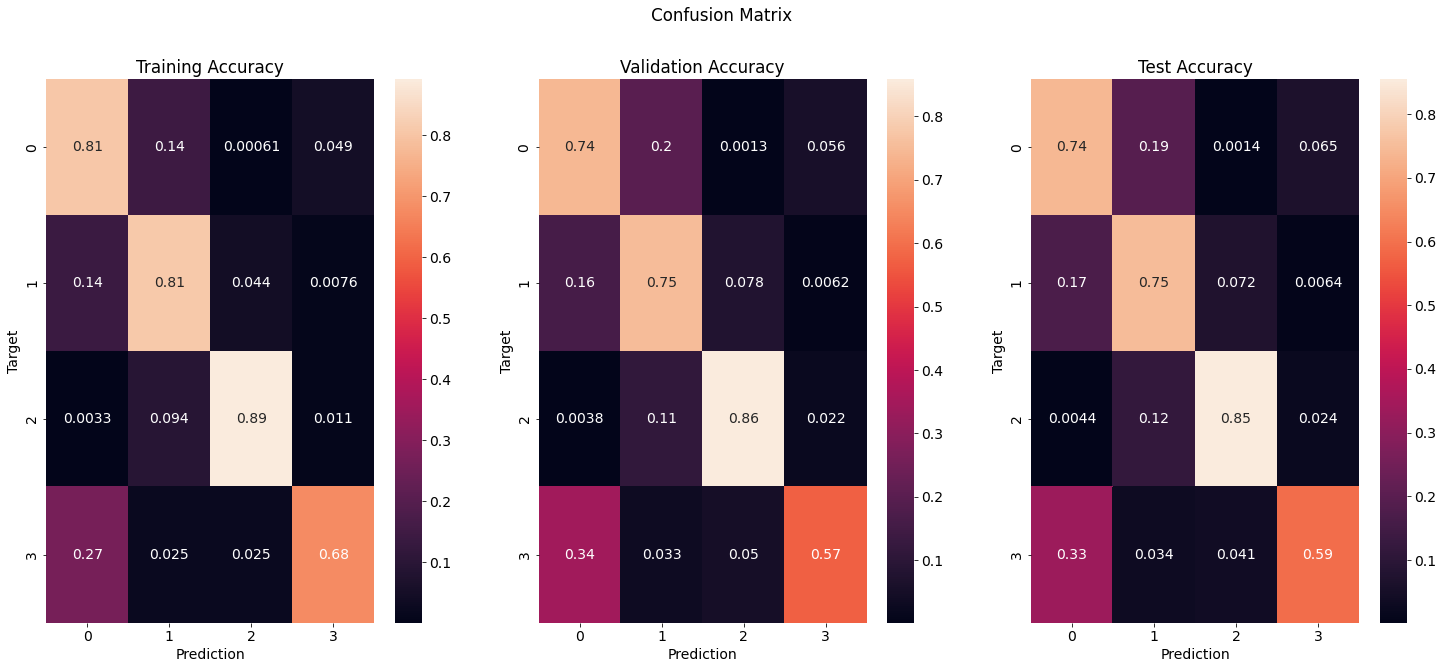

CPU times: user 1min 10s, sys: 378 ms, total: 1min 11s
Wall time: 1min 10s


In [60]:
%%time
xgb_hyper = try_model(xgb.XGBClassifier(**params))

## Decision Tree Classifier

In [68]:
clf = DecisionTreeClassifier(random_state=42)

Training Accuracy: 100.00%
Validation Accuracy: 63.88%
Test Accuracy: 64.72%


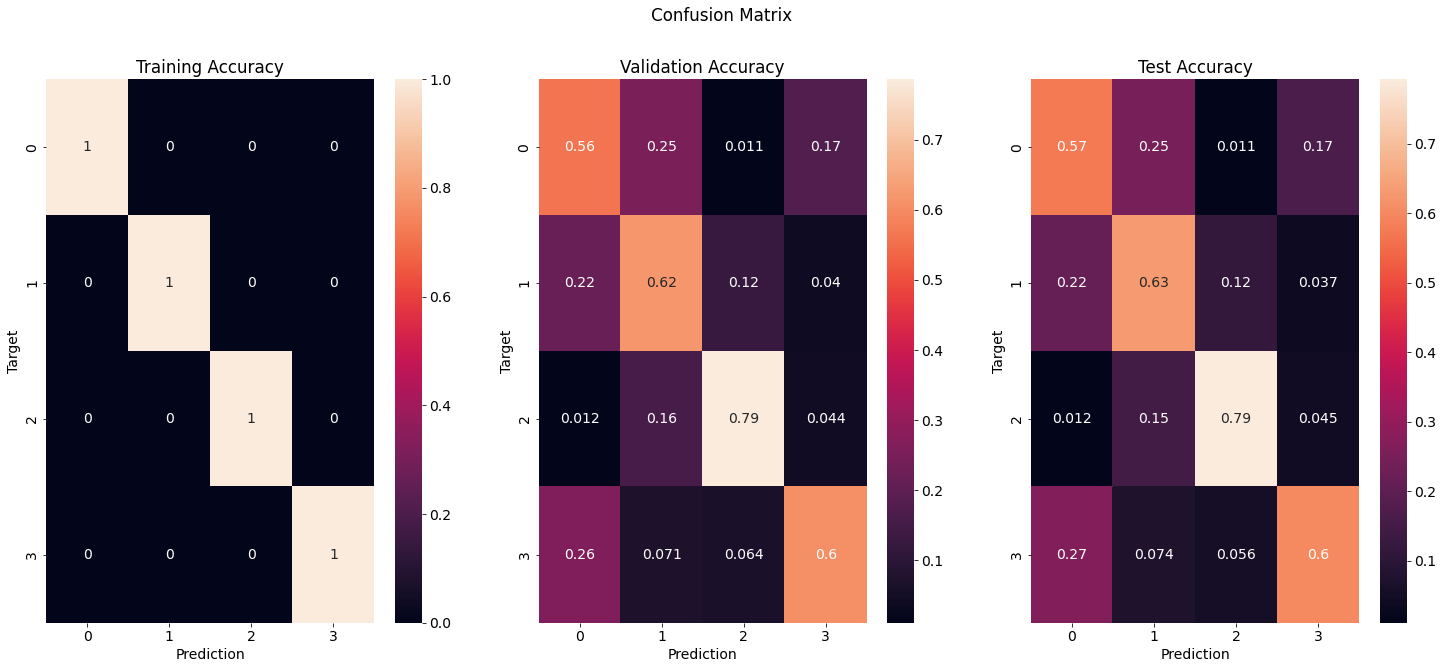

In [61]:
clf_model = try_model(clf)

In [62]:
clf_params =  {
 'max_depth': [3, 5, 7, 10, 13],
 'max_leaf_nodes': [5, 7, 9],
 'min_samples_leaf': [3, 5, 7],
 'min_samples_split': [4, 6, 8],
 }

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=3,
                       min_samples_split=6, random_state=42)
Training Accuracy: 69.02%
Validation Accuracy: 68.63%
Test Accuracy: 68.98%


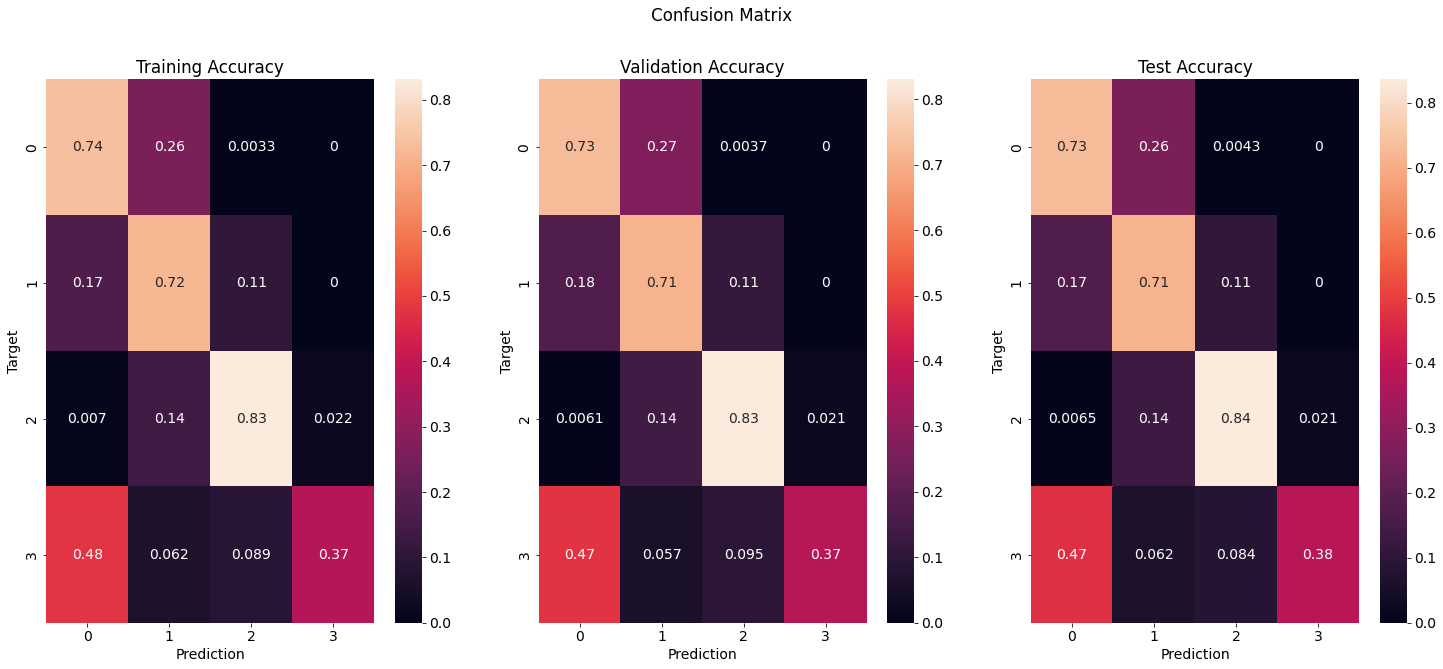

CPU times: user 39.2 s, sys: 341 ms, total: 39.6 s
Wall time: 39.3 s


In [69]:
%%time
clf_hyper = try_model(hyper_tune(clf, clf_params))

## Random Forest Classifier

In [70]:
rfc = RandomForestClassifier(random_state=42)

Training Accuracy: 100.00%
Validation Accuracy: 73.89%
Test Accuracy: 73.92%


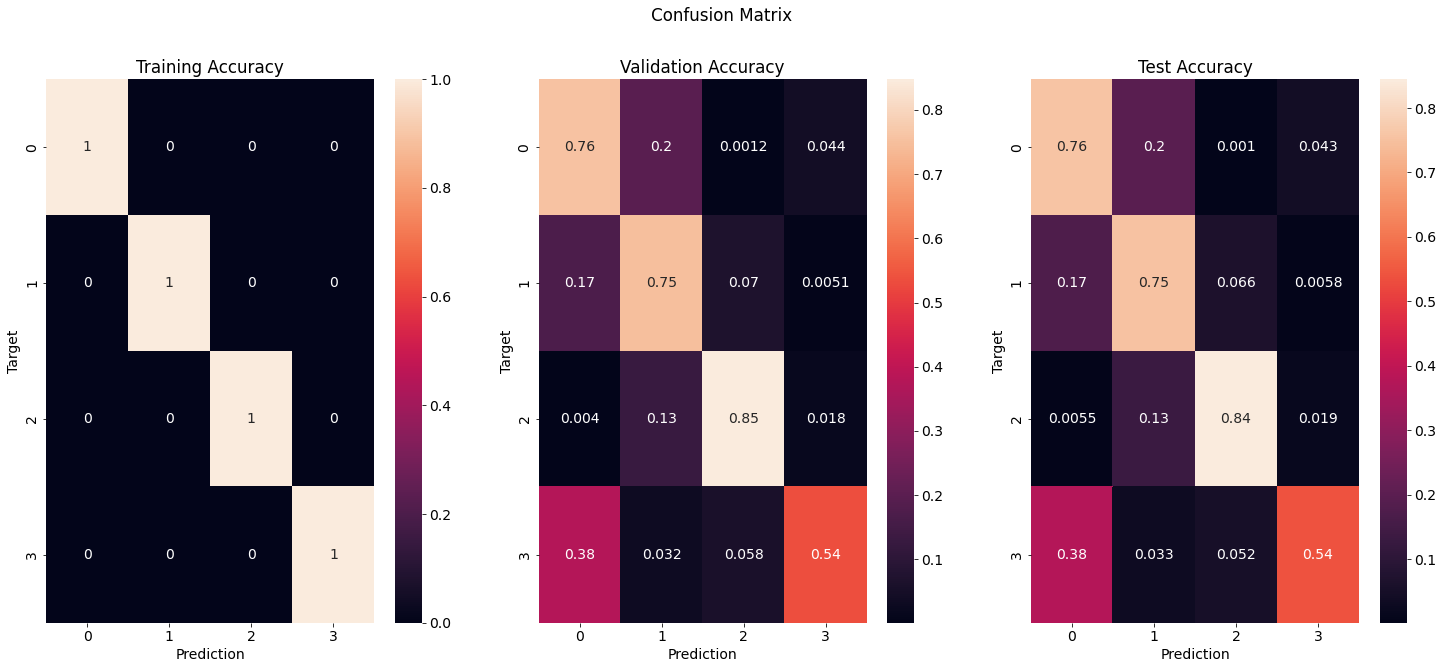

In [71]:
%%time
rfc_model = try_model(rfc)

In [78]:
rfc_params = {
 'max_depth': [3, 5, 7, 10, 13],
 'max_leaf_nodes': [7, 9, 11],
 'min_samples_leaf': [7, 9, 11],
 'min_samples_split': [2, 4, 6],
 }

RandomForestClassifier(max_depth=10, max_leaf_nodes=11, min_samples_leaf=9,
                       random_state=42)
Training Accuracy: 63.26%
Validation Accuracy: 62.91%
Test Accuracy: 63.02%


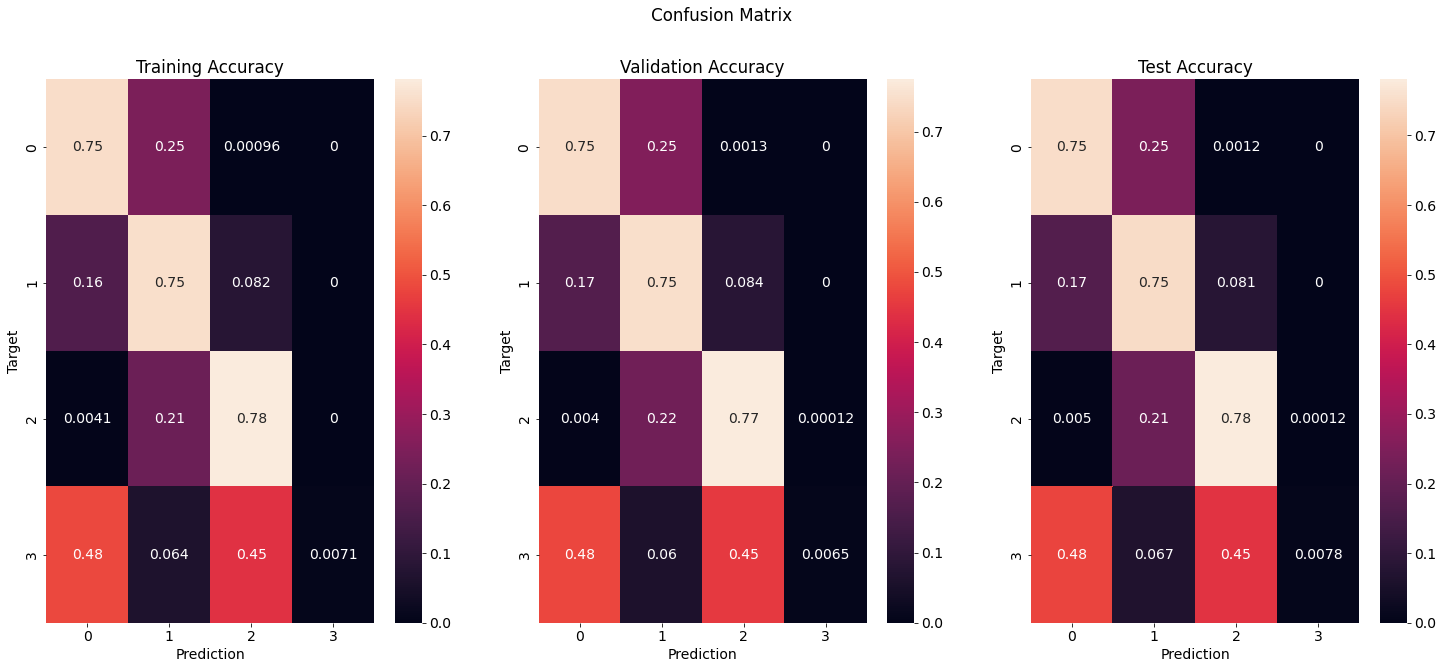

CPU times: user 11min 39s, sys: 3.25 s, total: 11min 42s
Wall time: 11min 39s


In [79]:
%%time
rfc_hyper = try_model(hyper_tune(rfc, rfc_params))

# 11. Comparing Results

In [87]:
results_matrix = np.array([log_model, xgb_model, xgb_hyper, clf_model, clf_hyper, rfc_model, rfc_hyper])

In [88]:
models = ["Logistic Regression", "XGB Classifier"," XGB Classifier - Tuned", 
          "Decision Tree Classifier", "Decision Tree Classifier - Tuned", "Random Forest Classifier", "Random Forest Classifier - Tuned"]

In [89]:
results_df = pd.DataFrame(results_matrix, columns=['Training Accuracy %', 'Validation Accuracy %', 'Test Accuracy %'])
results_df['Model'] = models
results_df[['Training Accuracy %', 'Validation Accuracy %', 'Test Accuracy %']] = round(results_df[['Training Accuracy %', 'Validation Accuracy %', 'Test Accuracy %']] * 100, 2)
results_df.sort_values('Test Accuracy %', ascending=False).reset_index(drop=True)

,Training Accuracy %,Validation Accuracy %,Test Accuracy %,Model
0,80.51,74.47,74.41,XGB Classifier - Tuned
1,100.00,73.89,73.92,Random Forest Classifier
2,73.06,72.87,72.92,XGB Classifier
3,69.02,68.63,68.98,Decision Tree Classifier - Tuned
4,100.00,63.88,64.72,Decision Tree Classifier
5,63.26,62.91,63.02,Random Forest Classifier - Tuned
6,63.04,62.75,62.94,Logistic Regression


# 12. Conclusion and References

## i. Conclusion

The intention for this project is to show the use of machine learning in taking large sets of data and using it to display useful information. In this case its a prediction of Airplane arrival delay given factors such as the day of the year, the various delays in security, departure delay, time to taxi and such. The various machine learning models used in this project (Logistic Regression, Decision Tree Classifier, XGB Classifier and Random Forest Classifier) all showed various levels of accuracy, however the best one was the XGB Classifier at a test accuracy of 75%.

## iii. References

- https://scikit-learn.org/stable/modules/classes.html#
- https://stackoverflow.com/
- https://www.kaggle.com/datasets/giovamata/airlinedelaycauses
- https://www.kaggle.com/datasets/srinathnanduri97/weather-data-for-265-airports-in-the-united-states
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems
- https://www.wunderground.com/
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/logistic-regression-for-classification
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- https://www.kaggle.com/code/vaishnavidixit12/flight-delay-prediction-0-9983-accuracy
- https://analyticsindiamag.com/implementing-bayesian-optimization-on-xgboost-a-beginners-guide/

# 13. Save the Project

In [77]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nsrinath97/airplane-delay-prediction-machine-learning-project


'https://jovian.ai/nsrinath97/airplane-delay-prediction-machine-learning-project'